In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [3]:
returns = pd.read_csv("../data/udemy/returns.csv", index_col=["Date"], parse_dates = ["Date"])

returns.head()

,GBP_USD,USD_GBP,Levered,Low_Vol,Random,Neutral
Date,,,,,,
2010-01-02,-0.002733,0.002733,0.006275,0.0,0.002733,0
2010-01-03,-0.001727,0.001727,0.003967,0.0,0.000000,0
2010-01-04,-0.005786,0.005786,0.013259,0.0,0.005786,0
2010-01-05,0.001687,-0.001687,-0.003884,0.0,0.001687,0
2010-01-06,-0.005446,0.005446,0.012482,0.0,0.005446,0


In [4]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3139 entries, 2010-01-02 to 2020-12-30
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   GBP_USD  3139 non-null   float64
 1   USD_GBP  3139 non-null   float64
 2   Levered  3139 non-null   float64
 3   Low_Vol  3139 non-null   float64
 4   Random   3139 non-null   float64
 5   Neutral  3139 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 171.7 KB


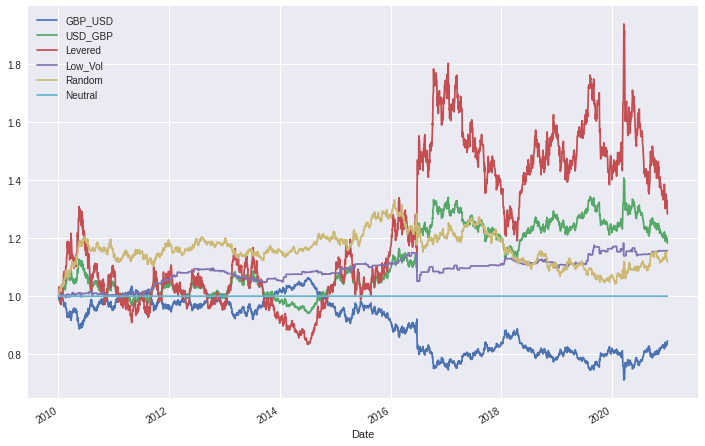

In [7]:
returns.cumsum().apply(np.exp).plot(figsize=(12,8))
plt.show()

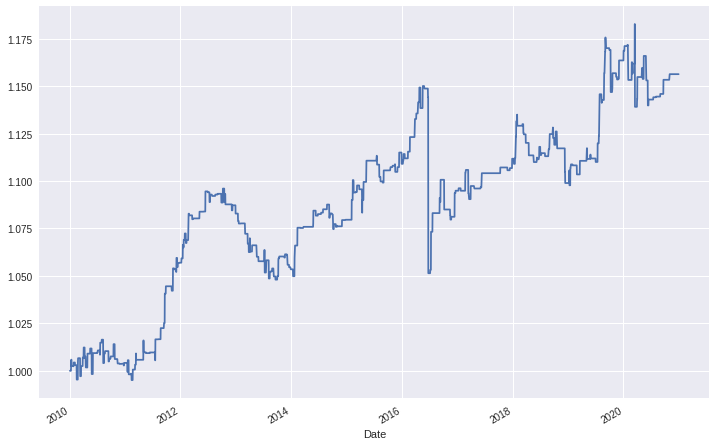

In [8]:
returns["Low_Vol"].cumsum().apply(np.exp).plot(figsize=(12,8))
plt.show()

In [9]:
returns["Low_Vol"].value_counts()

 0.000000    2826
-0.001950       1
 0.001149       1
 0.011488       1
 0.001376       1
             ... 
 0.002467       1
-0.002912       1
-0.005013       1
 0.003929       1
 0.002567       1
Name: Low_Vol, Length: 314, dtype: int64

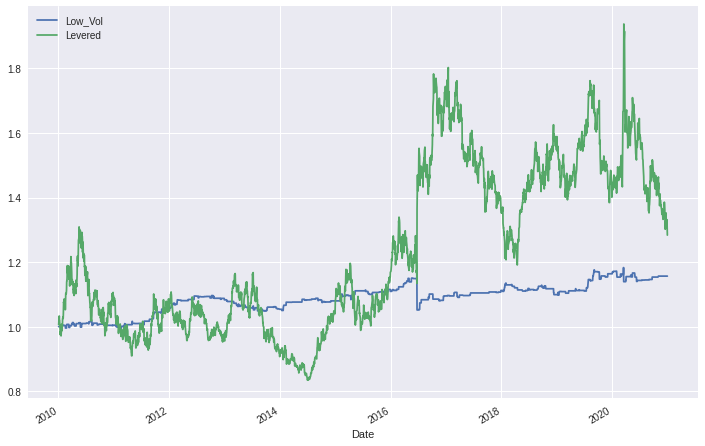

In [13]:
returns[["Low_Vol", "Levered"]].cumsum().apply(np.exp).plot(figsize=(12,8))
plt.show()

In [14]:
returns.mean()

GBP_USD   -0.000053
USD_GBP    0.000053
Levered    0.000080
Low_Vol    0.000046
Random     0.000036
Neutral    0.000000
dtype: float64

In [16]:
td_year = returns.count() / ((returns.index[-1]-returns.index[0]).days / 365.25)

td_year

GBP_USD    285.559091
USD_GBP    285.559091
Levered    285.559091
Low_Vol    285.559091
Random     285.559091
Neutral    285.559091
dtype: float64

In [17]:
ann_mean = returns.mean() * td_year

ann_mean

GBP_USD   -0.015231
USD_GBP    0.015231
Levered    0.022704
Low_Vol    0.013213
Random     0.010229
Neutral    0.000000
dtype: float64

In [18]:
# CAGR

np.exp(ann_mean) - 1

GBP_USD   -0.015116
USD_GBP    0.015348
Levered    0.022964
Low_Vol    0.013300
Random     0.010281
Neutral    0.000000
dtype: float64

In [20]:
summary = pd.DataFrame(data={"ann_mean": ann_mean})

summary

,ann_mean
GBP_USD,-0.015231
USD_GBP,0.015231
Levered,0.022704
Low_Vol,0.013213
Random,0.010229
Neutral,0.000000


In [21]:
summary.rank(ascending=False)

,ann_mean
GBP_USD,6.0
USD_GBP,2.0
Levered,1.0
Low_Vol,3.0
Random,4.0
Neutral,5.0


In [22]:
ann_std = returns.std() * np.sqrt(td_year)

ann_std

GBP_USD    0.091162
USD_GBP    0.091162
Levered    0.208838
Low_Vol    0.040267
Random     0.077976
Neutral    0.000000
dtype: float64

In [23]:
summary["ann_std"] = ann_std

In [24]:
summary

,ann_mean,ann_std
GBP_USD,-0.015231,0.091162
USD_GBP,0.015231,0.091162
Levered,0.022704,0.208838
Low_Vol,0.013213,0.040267
Random,0.010229,0.077976
Neutral,0.000000,0.000000


## Graphical Solution

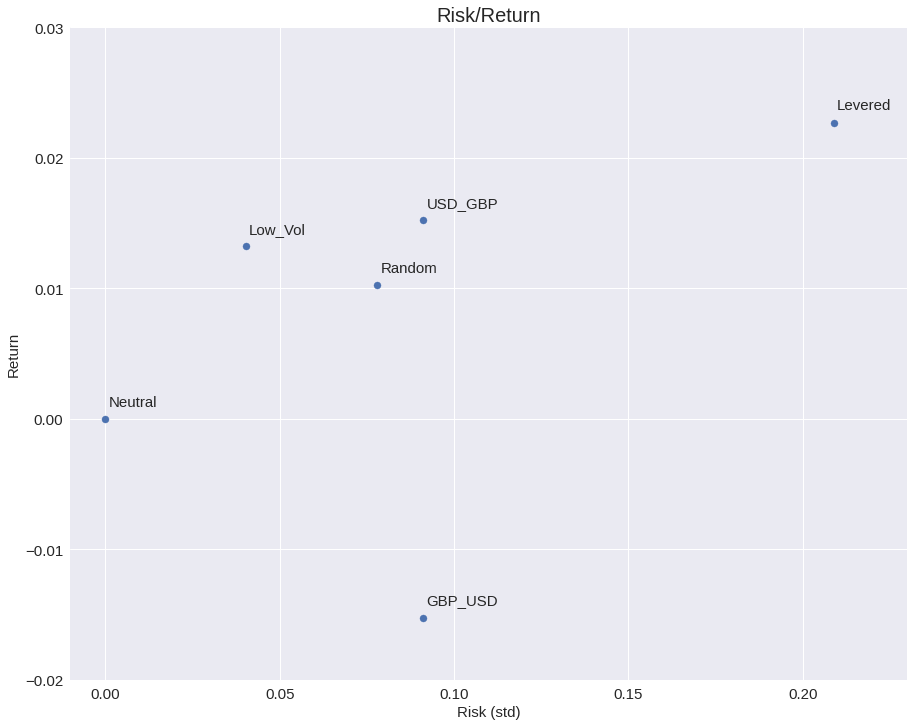

In [25]:
summary.plot(kind="scatter", x="ann_std", y="ann_mean", figsize=(15,12),s=50, fontsize=15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i,"ann_std"]+0.001, summary.loc[i,"ann_mean"]+0.001), size=15)
plt.xlim(-0.01, 0.23)
plt.ylim(-0.02,0.03)
plt.xlabel("Risk (std)", fontsize=15)
plt.ylabel("Return", fontsize=15)
plt.title("Risk/Return", fontsize=20)
plt.show()


## Sharpe Ratio

In [35]:
rf = 0
summary["sharpe"] = (returns.mean() - rf) / returns.std() * np.sqrt(td_year)

In [36]:
summary.sort_values(by="sharpe", ascending=False)

,ann_mean,ann_std,sharpe
Low_Vol,0.013213,0.040267,0.328121
USD_GBP,0.015231,0.091162,0.167078
Random,0.010229,0.077976,0.131181
Levered,0.022704,0.208838,0.108715
GBP_USD,-0.015231,0.091162,-0.167078
Neutral,0.000000,0.000000,NaN
